I have been checking out the spacy nlp library and wanted to try some of it's abilities on this quora dataset. This notebook generates two new sets of features that might help your models. First, spacy tags the parts of speech in the texts it parses, which can be made into a sparse matrix and joined to the original dataframe. The second item is a similarity score between texts, I thought the 1-similarity number would be more intuitive so created a function around spacy's method. Hope this helps!


In [3]:
import pandas as pd
import spacy

In [4]:
train = pd.read_csv("./input/questions.zip")

In [5]:
train.head(10)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [7]:
train.shape

(404290, 6)

In [7]:
nlp = spacy.load("en")

In [13]:
question_list = []
for item in train['question1']:
    question_list.append(str(item))

#print(' '.join(question_list))    

In [26]:
test_mod = nlp(' '.join(question_list[0:10]))
type(test_mod)

spacy.tokens.doc.Doc

In [69]:
def pos_count(string):
    #counts parts of speech for each spacy document object
    parsed_string = nlp(string)
    pos_dict = {}
    
    for word in parsed_string:
        if word.pos_ in pos_dict:
            pos_dict[word.pos_] += 1
        else:    
            pos_dict[word.pos_] = 1
    return pos_dict    

In [74]:
print(train['question1'][3])
b = pos_count(train['question2'][3])
print(b)


Why am I mentally very lonely? How can I solve it?
{'NOUN': 2, 'DET': 1, 'ADV': 1, 'ADP': 1, 'PUNCT': 3, 'VERB': 3, 'NUM': 1}


In [78]:
pos_list = []
for item in train['question1'][0:4]:
    dict = pos_count(item)
    pos_list.append(dict)


[{'NOUN': 7, 'DET': 1, 'ADP': 3, 'PUNCT': 1, 'VERB': 2, 'PART': 1}, {'NOUN': 2, 'DET': 1, 'PROPN': 5, 'ADP': 1, 'PUNCT': 5, 'VERB': 1}, {'NOUN': 3, 'DET': 2, 'PRON': 1, 'ADJ': 1, 'ADV': 1, 'PROPN': 1, 'ADP': 2, 'PUNCT': 1, 'VERB': 3}, {'PUNCT': 2, 'VERB': 3, 'PRON': 3, 'ADJ': 1, 'ADV': 4}]


In [80]:
pd.DataFrame(pos_list)

,ADJ,ADP,ADV,DET,NOUN,PART,PRON,PROPN,PUNCT,VERB
0,NaN,3.0,NaN,1.0,7.0,1.0,NaN,NaN,1,2
1,NaN,1.0,NaN,1.0,2.0,NaN,NaN,5.0,5,1
2,1.0,2.0,1.0,2.0,3.0,NaN,1.0,1.0,1,3
3,1.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,2,3


In [20]:
train[['question1', 'question2']].loc[0:10]

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
6,Should I buy tiago?,What keeps childern active and far from phone ...
7,How can I be a good geologist?,What should I do to be a great geologist?
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?"
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?


In [24]:
nlp_list = []
questions = train[['question1', 'question2']][0:10]


In [58]:
def dis_similarity(question_pair):
    
    parsed1 = nlp(question_pair[0])
    parsed2 = nlp(question_pair[1])
    anti_sim = 1 - parsed1.similarity(parsed2)
    return anti_sim

In [45]:
len(questions)

10

In [ ]:
sample_qs = train.sample(10000)

In [70]:
sample_qs['dis'] = sample_qs[['question1','question2']].apply(dis_similarity, axis = 1)

In [71]:
sample_qs.head()

,id,qid1,qid2,question1,question2,is_duplicate,dis
55948,55948,98556,98557,What are some good home chest workouts I can do?,What are the best chest workouts to be done at...,0,0.078315
44791,44791,80351,80352,How can I open DWG files in Adobe Illustrator?,What is the difference between 780p and 1080i ...,0,0.257028
82769,82769,140279,1106,"Is skipping equal to jumping to lose weight, a...",How much weight will I lose by not eating for ...,0,0.115117
261249,261249,138811,377337,What impact does global warming have on biodiv...,Why is global warming a threat to biodiversity?,1,0.110458
389592,389592,152858,30038,Was/Is Barack Obama a bad/good president?,Has Obama been a bad president? What reasons d...,1,0.239918


In [100]:
sample_qs.describe()

,id,qid1,qid2,is_duplicate,dis
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,203616.47410,217487.728000,221665.372200,0.362500,9.967307e-02
std,117424.16225,158419.693595,161074.420149,0.480746,6.643455e-02
min,127.00000,3.000000,32.000000,0.000000,-1.123642e-07
25%,101531.00000,73905.250000,73766.000000,0.000000,5.406215e-02
50%,205220.50000,190245.500000,196819.000000,0.000000,8.838945e-02
75%,305762.00000,349640.000000,358802.500000,1.000000,1.331616e-01
max,404204.00000,537853.000000,537854.000000,1.000000,1.000000e+00


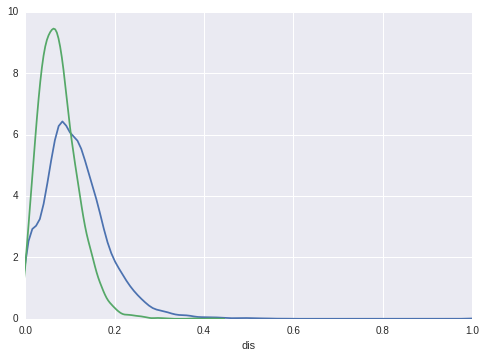

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for a in [sample_qs['dis'][sample_qs['is_duplicate']==0], sample_qs['dis'][sample_qs['is_duplicate']==1]]:
    sns.distplot(a, bins=range(0, 1, 10), ax=ax, kde=True)
ax.set_xlim([0, 1])

#sns.kdeplot(sample_qs['dis'][sample_qs['is_duplicate']==0], shade = True)
#plt.show()

plt.show()